## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest. (You can also check out `get_gss.ipynb` for some processed data.)
2. Write a short description of the data you chose, and why. (~500 words)
3. Load the data using Pandas. Clean them up for EDA. Do this in this notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations.
5. Describe your findings. (500 - 1000 words, or more)

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.


In [3]:
#1) variables chosen- year, wrkstat, evwork, hrs1, hrs2, occ10, indus10, prestige, wrkgovt
import pandas as pd

var_list = ['year', 'id', 'wrkstat', 'hrs1', 'hrs2', 'evwork', 'occ', 'prestige', 'wrkslf', 'wrkgovt']  # add vars you want
output_filename = 'selected_gss_data.csv'

phase = 0

for k in range(3):
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet'
    df = pd.read_parquet(url)
    df = df.loc[:, var_list]  # select only desired columns
    if phase == 0:
        df.to_csv(output_filename, mode='w', header=True, index=False)
        phase = 1
    else:
        df.to_csv(output_filename, mode='a', header=False, index=False)


2) For this lab, we chose to focus on variables from the General Social Survey (GSS) related to work and occupation. By examining employment status, hours worked, occupation codes, and occupational prestige, we want to explore how different work experiences vary across individuals and uncover patterns based on job type and employment sector. The specific variables we selected include: year (the  year the survey was taken), wrkstat (the status of the kabor force), evwork (measures whether or not the survey respondent has ever worked for at least one year), hrs1 (hours respondents worked last week), hrs2 (hours respondents usually worked per week), occ10 (the occupation code based on the 2010 Census), indus10 (the industry code that uses the NAICS classification), prestige (the score of the occupational prestige), and wrkgovt (whether the respondent works in the government or the private sector). Together, these variables shows us a overview of  each respondent’s work situation, workload, job type, and perception of their occupation by society. We were particularly interested in the prestige variable because it provides a standardized measure of how occupations are socially valued, not depending on income or education level. This allows us to investigate relationships between job prestige and variables like hours worked or employment sector. For example, we can explore whether government employees tend to work fewer hours than private sector workers, or whether jobs with higher prestige are associated with longer work hours. The wrkstat variable also helps us categorize respondents by their employment status—such as full-time, part-time, unemployed, or retired—which provides more information on labor force participation patterns. The variables on hours worked (hrs1 and hrs2) provide insight into the intensity of work and possible differences across sectors (government or private) or occupations. We also wanted to observe potential trends over time, such as changes in average hours worked or shifts in occupational prestige and we can do that by including year as a variable. Overall, all the variables combined  help us examine the relationships between employment status, work hours, occupation type, and prestige. We expect to find that full-time workers in certain occupations report higher prestige and that government and private sector workers differ in hours worked, job characteristics, and prestige. Through cleaning, summarizing, and visualizing this data, we hope to find some patterns that reflect broader labor market dynamics and provide insights into how work shapes people’s social and economic experiences.

/tmp/ipython-input-319315456.py:7: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('selected_gss_data.csv')


Data shape after cleaning: (1746, 10) 

Average hours worked last week (hrs1) by employment status (wrkstat):
wrkstat
working part time    22.387302
working full time    45.668064
Name: hrs1, dtype: float64 

Average occupational prestige by employment status (wrkstat):
wrkstat
working part time    35.926984
working full time    43.407407
Name: prestige, dtype: float64 

Average hours worked last week (hrs1) by employment sector (wrkgovt):
wrkgovt
government    41.442244
private       41.473319
Name: hrs1, dtype: float64 

Average occupational prestige by employment sector (wrkgovt):
wrkgovt
private       40.808039
government    48.009901
Name: prestige, dtype: float64


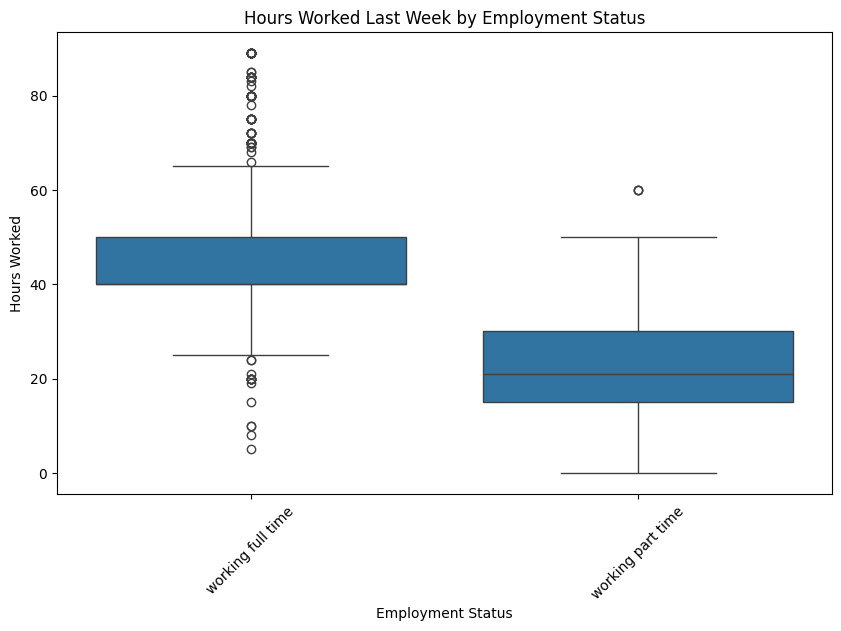

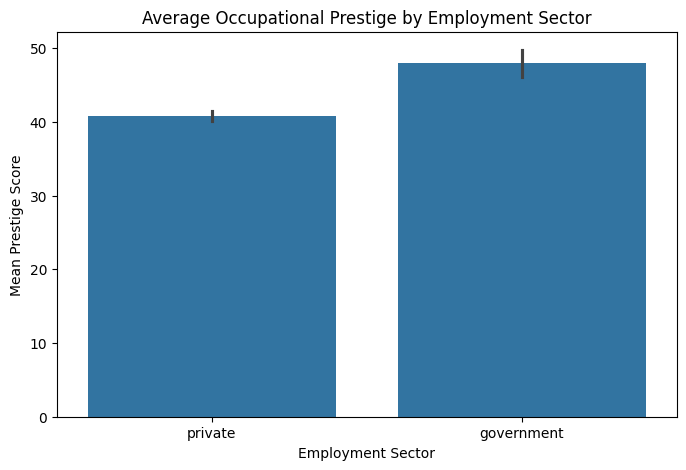

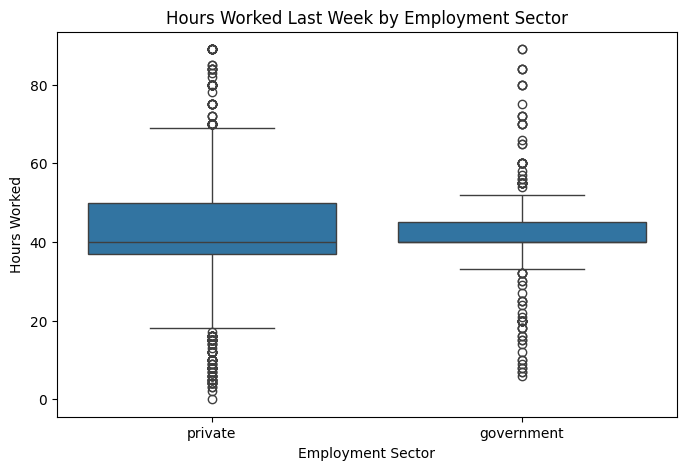

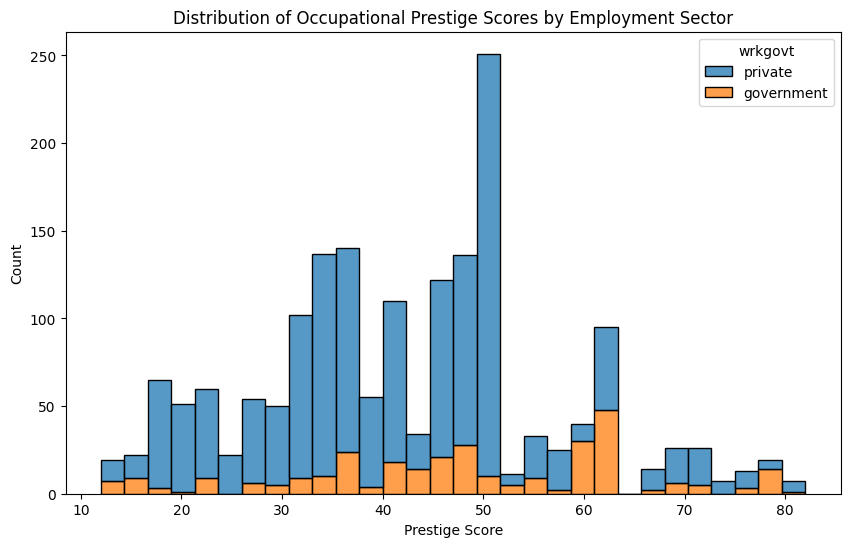

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#3) Loading & cleaning the data
# Load dataset
df = pd.read_csv('selected_gss_data.csv')

# Convert 'occ' to string to handle mixed types
df['occ'] = df['occ'].astype(str)

# Drop rows with missing values in key columns
df_clean = df.dropna(subset=['wrkstat', 'hrs1', 'prestige', 'wrkgovt'])

# Convert categorical variables
for col in ['wrkstat', 'evwork', 'wrkgovt']:
    df_clean.loc[:, col] = df_clean[col].astype('category')


print("Data shape after cleaning:", df_clean.shape, "\n")

# Numeric summaries
print("Average hours worked last week (hrs1) by employment status (wrkstat):")
print(df_clean.groupby('wrkstat', observed=True)['hrs1'].mean().sort_values(), "\n")

print("Average occupational prestige by employment status (wrkstat):")
print(df_clean.groupby('wrkstat', observed=True)['prestige'].mean().sort_values(), "\n")

print("Average hours worked last week (hrs1) by employment sector (wrkgovt):")
print(df_clean.groupby('wrkgovt', observed=True)['hrs1'].mean().sort_values(), "\n")

print("Average occupational prestige by employment sector (wrkgovt):")
print(df_clean.groupby('wrkgovt', observed=True)['prestige'].mean().sort_values())


#4)Visualizations

# 1.Hours worked last week by employment status
plt.figure(figsize=(10,6))
sns.boxplot(data=df_clean, x='wrkstat', y='hrs1')
plt.title('Hours Worked Last Week by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Hours Worked')
plt.xticks(rotation=45)
plt.show()

# 2.Average occupational prestige by employment sector (with 95% CI)
plt.figure(figsize=(8,5))
sns.barplot(data=df_clean, x='wrkgovt', y='prestige', errorbar=('ci', 95))
plt.title('Average Occupational Prestige by Employment Sector')
plt.xlabel('Employment Sector')
plt.ylabel('Mean Prestige Score')
plt.show()

# 3.Hours worked last week by employment sector
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x='wrkgovt', y='hrs1')
plt.title('Hours Worked Last Week by Employment Sector')
plt.xlabel('Employment Sector')
plt.ylabel('Hours Worked')
plt.show()

# 4.Distribution of occupational prestige scores
plt.figure(figsize=(10,6))
sns.histplot(data=df_clean, x='prestige', bins=30, hue='wrkgovt', multiple='stack', kde=False)
plt.title('Distribution of Occupational Prestige Scores by Employment Sector')
plt.xlabel('Prestige Score')
plt.ylabel('Count')
plt.show()




4)
Examining the employment data revealed to us clear differences in hours worked and occupational prestige based on both employment status and sector. As expected, full-time workers average about 45.67 hours per week, which is roughly double the 22.39 hours worked by part-time employees. This large gap highlights the fundamental difference in commitment and workload between part-time and full-time employment which reflects  typical structures. One interesting thing we discovered was that government employees work on average 41.44 hours per week, slightly less than private sector employees, who average 41.47 hours. Although this difference is minimal, visualizations suggest that the private sector tends to have a wider spread of hours worked, indicating more variability in work schedules compared to the government sector. The government’s distribution of hours worked is more concentrated, suggesting more standardized or maybe more regulated work hours among public employees.

Occupational prestige scores further highlight the contrasts between sectors and employment types. Full-time workers have higher average prestige scores (43.41) compared to part-time workers (35.93), consistent with the notion that full-time roles are often associated with higher-skilled, more valued positions in society. Between sectors, government employees hold jobs with significantly higher prestige (mean score of 48.01) than those in the private sector (mean score of 40.81). This difference is notable not only in mean scores but also in variability; the government sector exhibits less variability in prestige scores, implying a more uniform concentration of prestige occupations. The private sector, however, shows greater variability, suggesting a broader mix of job types ranging from low to high prestige.

These patterns underscore social and economic stratifications inherent in employment structures: government jobs often represent stable, well-regarded positions with regulated hours, while the private sector spans a wider spectrum of work hours and occupational statuses. Together, the data and visualizations reveal how employment status and sector influence both the quantity of work and its social valuation, offering important insights for workforce analysis, policy, and maybe even career guidance.